# Практическое задание

 Почему пользователи на заканчивают курс до конца?
 Как предсказать, что пользователь бросит наш курс?
 Какими основными паттернами поведения взаимодействия с контентом обладают пользователи, которые успешно 
 заканчивают курсы по сравнению с теми, кто эти курсы бросает?
 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Данные 

In [2]:
event_data = pd.read_csv('data/event_data_train.csv')
event_data.head(10)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [3]:
event_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

Преобразуем данные для лучшей читабельности.
1. Переведем timestamp в нормальную дату.

In [4]:
event_data['date'] = pd.to_datetime(event_data.timestamp, unit='s')
event_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [5]:
event_data.date.min()

Timestamp('2015-06-15 04:00:48')

2. Добавим колонку - день выполнения степа

In [6]:
event_data['day'] = event_data.date.dt.date
event_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


Посчитаем, сколько людей заходило на степик каждый день

In [8]:
event_data.groupby('day').user_id.nunique().head()

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
Name: user_id, dtype: int64

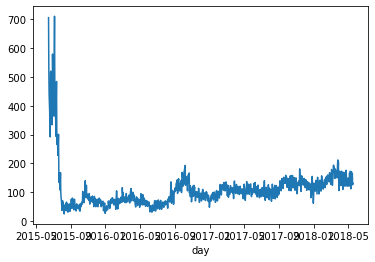

In [9]:
event_data.groupby('day').user_id.nunique().plot()

Посмотрим распределение пользователей по количеству набранных баллов

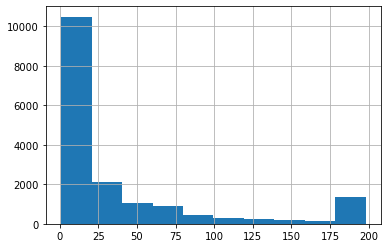

In [13]:
event_data[event_data.action == 'passed'].groupby('user_id', as_index=False).agg({'step_id': 'count'})\
    .rename(columns={'step_id': 'passed_step'}).passed_step.hist()

Мы потеряли пользователей, которые не решили ни одного степа.
Попробуем другой метод.

In [16]:
event_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0)\
    .reset_index().head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


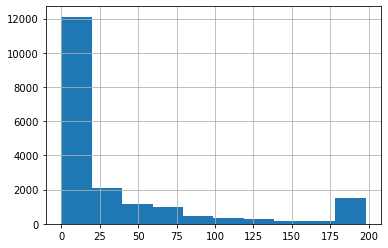

In [18]:
event_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0)\
    .reset_index().discovered.hist()
